# **CGA and Interpolations**

This section is based on the article "Direct Linear Interpolation of Geometric Objects in Conformal Geometric Algebra" by Hadfield and Lasenby.

In [1]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`
┌ Warning: For saving to png with the `Plotly` backend `PlotlyBase` and `PlotlyKaleido` need to be installed.
│   err = ArgumentError("Package PlotlyBase not found in current path.\n- Run `import Pkg; Pkg.add(\"PlotlyBase\")` to install the PlotlyBase package.")
└ @ Plots /home/davibarreira/.julia/packages/Plots/M4dfL/src/backends.jl:545


## 1. Interpolating Points

From a vector $\mathbf v$, recall that we can contruct a point in the CGA model as

$$
F(\mathbf v) = n_o + \mathbf v  + \frac{1}{2}(\mathbf v \cdot \mathbf v) n_\infty.
$$

Given two point $a$ and $b$, we might wish to interpolate them. This could be done using
$$
F(\lambda \mathbf a + (1-\lambda) \mathbf b),
$$
where $\mathbf a$ and $\mathbf b$ are the Euclidean coordinates of the points.

As pointed out by Hadfield and Lasenby

$$
F(\lambda \mathbf a + (1-\lambda) \mathbf b) = \lambda a + (1-\lambda) b + \lambda(1-\lambda) (a \cdot b) n_\infty.
$$

This formula shows us that if we have two points in CGA and want to interpolate them we can just
interpolate them and add the extra $\lambda(1-\lambda) (a \cdot b) n_\infty$. This would give
us the interpolated point in CGA.

The "inverse" problem also has a solution, i.e. given the interpolation $c' = \lambda a + (1- \lambda)b)$, we want to 
obtain $c = F(\lambda \mathbf a + (1-\lambda) \mathbf b)$. Note that $c'$ is not a point in CGA, but $c$ is. Hence, we were
given only the interpolation $c'$ and want to figure out $c$ without knowing who $a$ and $b$ are. We can solve this using:

$$
c = \frac{- c' n_\infty  c'}{2(c' \cdot n_\infty)^2}
$$

In [4]:
cl = CliffordAlgebra(:CGA3D)

no  = (cl.e₊ + cl.e₋)/2
n∞  = cl.e₋ - cl.e₊

F(x) = no + x + (x ⋅ x) * n∞ /2
point(x=0,y=0,z=0)  = no + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2) * n∞/2

point (generic function with 4 methods)

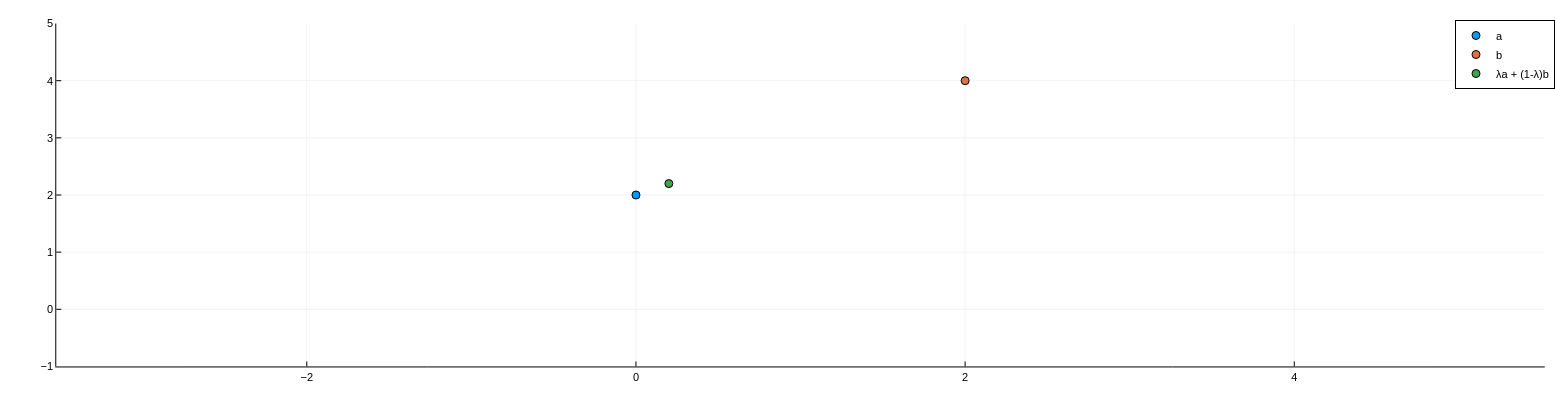

In [26]:
a = point(0,2,0)
b = point(2,4,0)
λ = 0.9
c = λ*a + (1-λ)*b + λ*(1-λ)*(a ⋅ b)* n∞

p1 = scatter([a.e1],[a.e2],label="a")
p1 = scatter!([b.e1],[b.e2],label="b", aspect_ratio=1,ylims=(-1,5))
p1 = scatter!([c.e1],[c.e2],legend=true,label="λa + (1-λ)b")

In [36]:
c_ = λ*a + (1-λ)*b

@show (-c_*n∞ *c_)/(2*((c_ ⋅ n∞)^2)) ≈ c;

(-c_ * n∞ * c_) / (2 * (c_ ⋅ n∞) ^ 2) ≈ c = true
